SAMPLE INFO:
       Sample Condition
0  Kelley_17         C
1  Kelley_18         C
2  Kelley_19         C
3  Kelley_20         C
4  Kelley_21       mut
5  Kelley_22       mut
6  Kelley_23       mut
7  Kelley_24       mut 

Control IDs: ['Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20']
Mutant IDs: ['Kelley_21', 'Kelley_22', 'Kelley_23', 'Kelley_24'] 

Initial shape of read-count table: (32833, 33)
Column headers in read-count table:
 ['gname', 'Kelley_1', 'Kelley_2', 'Kelley_3', 'Kelley_4', 'Kelley_5', 'Kelley_6', 'Kelley_7', 'Kelley_8', 'Kelley_9', 'Kelley_10', 'Kelley_11', 'Kelley_12', 'Kelley_13', 'Kelley_14', 'Kelley_15', 'Kelley_16', 'Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20', 'Kelley_21', 'Kelley_22', 'Kelley_23', 'Kelley_24', 'Kelley_25', 'Kelley_26', 'Kelley_27', 'Kelley_28', 'Kelley_29', 'Kelley_30', 'Kelley_31', 'Kelley_32']

Filtered read-count table dimensions: (25468, 8)
Filtered columns: ['Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20', 'Kelley_21', 'Kelley_2

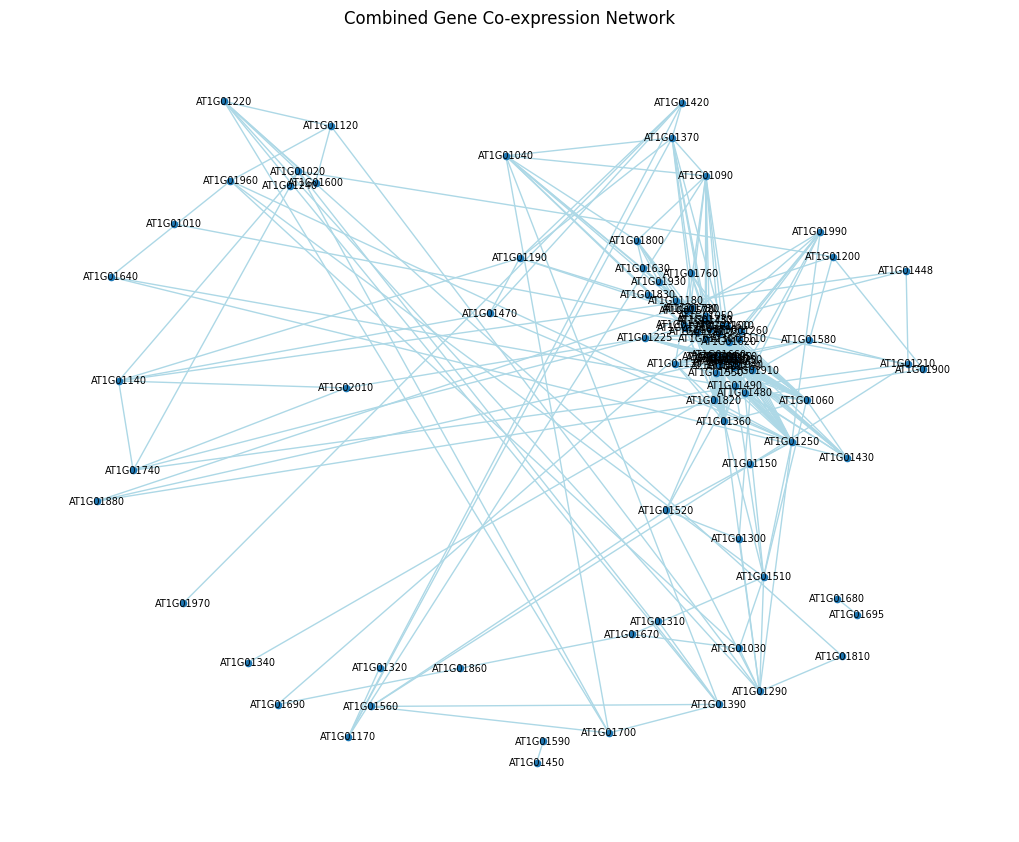

Top 10 hub genes (by degree):
[('AT1G01350', 33), ('AT1G01100', 31), ('AT1G01500', 31), ('AT1G01160', 30), ('AT1G01725', 30), ('AT1G01490', 29), ('AT1G01950', 29), ('AT1G01440', 28), ('AT1G01790', 28), ('AT1G01060', 27)]

Top 10 genes by degree centrality:
[('AT1G01350', 0.3626373626373627), ('AT1G01100', 0.34065934065934067), ('AT1G01500', 0.34065934065934067), ('AT1G01160', 0.3296703296703297), ('AT1G01725', 0.3296703296703297), ('AT1G01490', 0.3186813186813187), ('AT1G01950', 0.3186813186813187), ('AT1G01440', 0.3076923076923077), ('AT1G01790', 0.3076923076923077), ('AT1G01060', 0.2967032967032967)]

Top 10 genes by clustering coefficient:
[('AT1G01630', 1.0), ('AT1G01880', 1.0), ('AT1G01900', 1.0), ('AT1G01810', 1.0), ('AT1G01610', 0.8285714285714286), ('AT1G01660', 0.8181818181818182), ('AT1G01430', 0.8), ('AT1G01710', 0.7748917748917749), ('AT1G01940', 0.7368421052631579), ('AT1G01750', 0.7355072463768116)]

Top 10 genes by betweenness centrality:
[('AT1G01250', 0.132478243697533

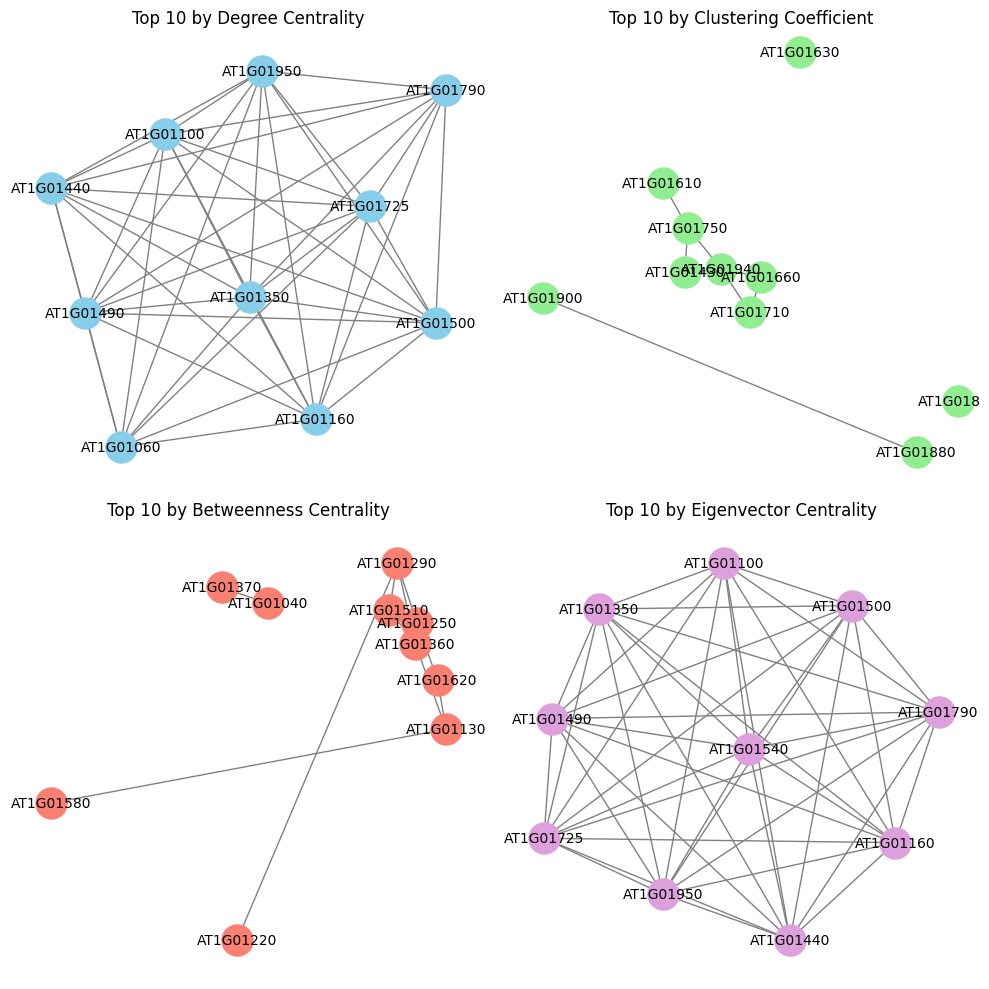


Control Network: 94 nodes, 2126 edges
Mutant Network:  91 nodes, 1996 edges


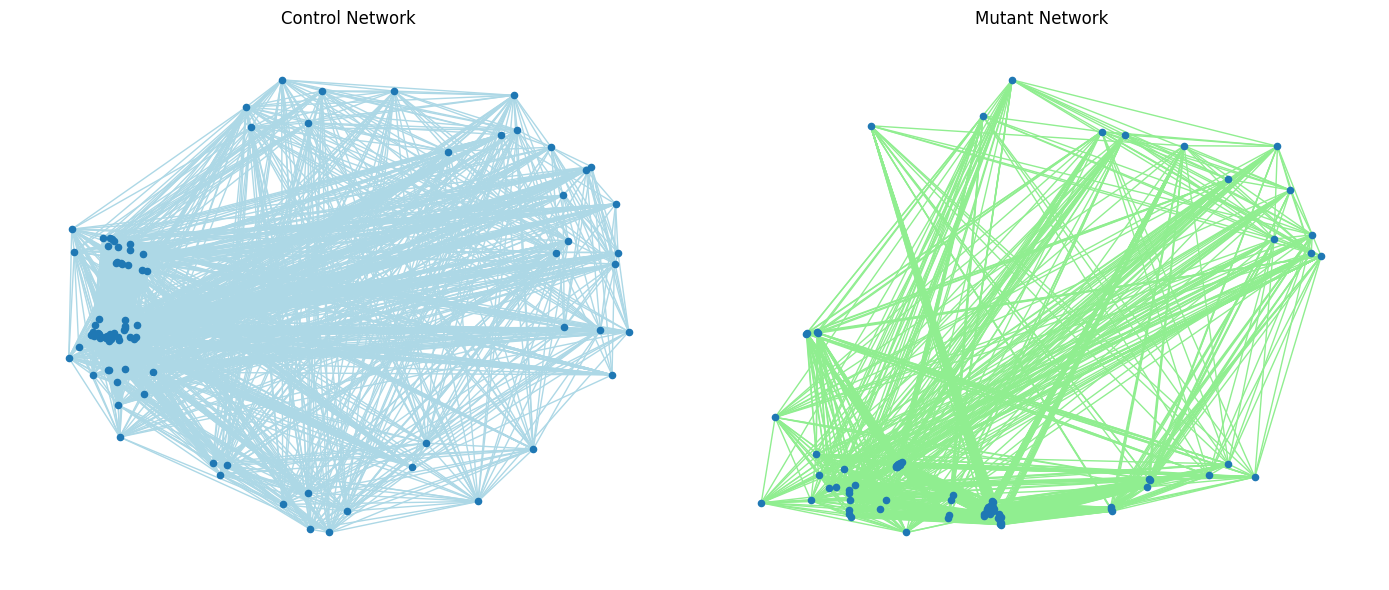


Top 10 hub genes in Control network:
[('AT1G01050', 58), ('AT1G01060', 58), ('AT1G01110', 58), ('AT1G01190', 58), ('AT1G01420', 58), ('AT1G01440', 58), ('AT1G01540', 58), ('AT1G01550', 58), ('AT1G01610', 58), ('AT1G01620', 58)]

Top 10 hub genes in Mutant network:
[('AT1G01150', 63), ('AT1G01250', 63), ('AT1G01520', 63), ('AT1G01560', 63), ('AT1G01480', 61), ('AT1G01800', 61), ('AT1G01040', 54), ('AT1G01100', 54), ('AT1G01130', 54), ('AT1G01225', 54)]

Density of Control network: 0.4863875543353924
Density of Mutant network:  0.4874236874236874

Average degree in Control network: 45.234042553191486
Average degree in Mutant network:  43.86813186813187

Common hub genes:          set()
Unique Control hub genes:  {'AT1G01550', 'AT1G01420', 'AT1G01060', 'AT1G01610', 'AT1G01110', 'AT1G01050', 'AT1G01540', 'AT1G01620', 'AT1G01190', 'AT1G01440'}
Unique Mutant hub genes:   {'AT1G01560', 'AT1G01480', 'AT1G01040', 'AT1G01100', 'AT1G01225', 'AT1G01520', 'AT1G01250', 'AT1G01130', 'AT1G01800', 'AT

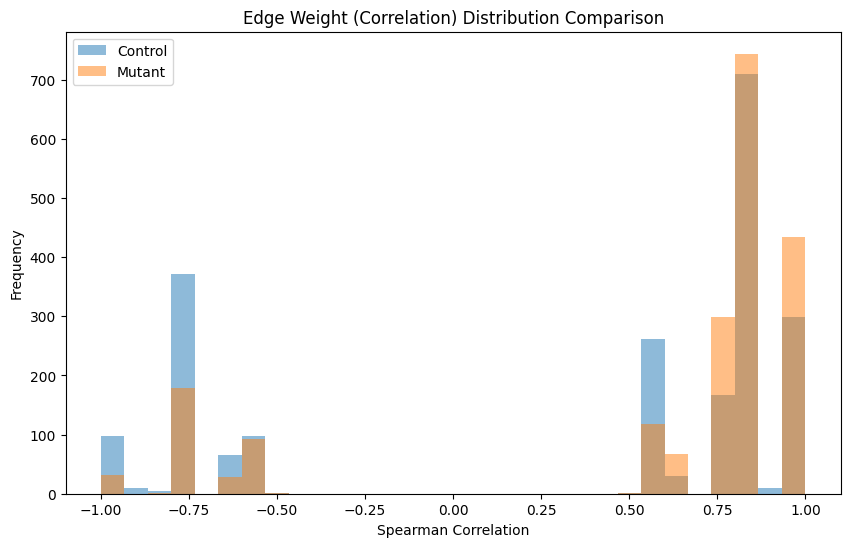


Done!


In [3]:
#!/usr/bin/env python3

#===============================================================================
# 1) Import Libraries
#===============================================================================
# !pip install scipy statsmodels networkx seaborn
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

#===============================================================================
# 2) Define Sample Info (Control vs. Mutant)
#===============================================================================
sample_info_dict = {
    "Sample": ["Kelley_17", "Kelley_18", "Kelley_19", "Kelley_20",
               "Kelley_21", "Kelley_22", "Kelley_23", "Kelley_24"],
    "Condition": ["C", "C", "C", "C",
                  "mut", "mut", "mut", "mut"]
}
sample_info = pd.DataFrame(sample_info_dict)
print("SAMPLE INFO:\n", sample_info, "\n")

# Identify control vs. mutant groups
ctrl_list = sample_info.loc[sample_info['Condition'] == 'C', 'Sample'].tolist()
variant_list = sample_info.loc[sample_info['Condition'] == 'mut', 'Sample'].tolist()
print("Control IDs:", ctrl_list)
print("Mutant IDs:", variant_list, "\n")

#===============================================================================
# 3) Load Read-Count Table, Filter by Sample
#===============================================================================
read_df = pd.read_csv('read_counts_table.csv')
print("Initial shape of read-count table:", read_df.shape)
print("Column headers in read-count table:\n", list(read_df.columns))

# Make 'gname' column the index
read_df = read_df.set_index('gname')

# Exclude genes with zero total counts
read_df = read_df[read_df.sum(axis=1) > 0]

# List of needed columns (control + mutant)
all_samples = ctrl_list + variant_list

# Filter the read-count table to keep only the desired samples
read_df = read_df[all_samples]
print("\nFiltered read-count table dimensions:", read_df.shape)
print("Filtered columns:", list(read_df.columns))

# (Optional) Ensure sample_info has the proper index for downstream
sample_info.set_index('Sample', inplace=True)
sample_info["Condition"] = sample_info["Condition"].astype("category")
sample_info["Condition"] = sample_info["Condition"].cat.reorder_categories(["C", "mut"], ordered=True)

#===============================================================================
# 4) (Optional) Subset Genes for Testing
#     Remove or change the number of genes as appropriate.
#===============================================================================
read_df = read_df.iloc[:100, :]

#===============================================================================
# 5) Build a Combined Network (Control + Mutant)
#===============================================================================
def calculate_correlation_matrix(expression_data):
    """Returns a Spearman correlation matrix from expression DataFrame."""
    return expression_data.corr(method='spearman')

def create_network(corr_matrix, threshold=0.5):
    """
    Creates a co-expression network from a correlation matrix (abs corr >= threshold).
    Nodes are genes; edges exist if the absolute Spearman correlation >= threshold.
    """
    G = nx.Graph()
    for i, gene1 in enumerate(corr_matrix.index):
        for j, gene2 in enumerate(corr_matrix.columns):
            if i < j:  # avoid double-counting edges
                value = corr_matrix.iloc[i, j]
                if abs(value) >= threshold:
                    G.add_edge(gene1, gene2, weight=value)
    return G

expression_data_transposed = read_df.T
combined_corr_matrix = calculate_correlation_matrix(expression_data_transposed)
combined_network = create_network(combined_corr_matrix, threshold=0.7)

print(f"Combined Network: {combined_network.number_of_nodes()} nodes "
      f"and {combined_network.number_of_edges()} edges")

# ---------------------------
#   Save Combined Network as CSV
# ---------------------------
# We extract edges (Gene1, Gene2, Correlation) from the NetworkX graph
combined_edges = []
for (u, v, d) in combined_network.edges(data=True):
    combined_edges.append([u, v, d["weight"]])

combined_edges_df = pd.DataFrame(combined_edges, columns=["Gene1", "Gene2", "Correlation"])
combined_edges_df.to_csv("combined_network_edges.csv", index=False)

# Quick visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(combined_network, seed=42)
nx.draw(combined_network, pos, with_labels=False, node_size=20, edge_color="lightblue")
nx.draw_networkx_labels(combined_network, pos, 
                        labels={node: node for node in combined_network.nodes},
                        font_size=7)
plt.title("Combined Gene Co-expression Network")
plt.show()

#===============================================================================
# 6) Network Statistics and Hub Genes (Combined)
#===============================================================================
degrees = dict(combined_network.degree())
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
print("Top 10 hub genes (by degree):")
print(sorted_degrees[:10])

degree_centrality = nx.degree_centrality(combined_network)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 genes by degree centrality:")
print(sorted_centrality[:10])

clustering = nx.clustering(combined_network)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 genes by clustering coefficient:")
print(sorted_clustering[:10])

betweenness = nx.betweenness_centrality(combined_network)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 genes by betweenness centrality:")
print(sorted_betweenness[:10])

eigenvector = nx.eigenvector_centrality(combined_network)
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 genes by eigenvector centrality:")
print(sorted_eigenvector[:10])

# Create subgraphs for top 10 genes in each metric
top_degree_centrality_genes = [gene for gene, _ in sorted_centrality[:10]]
top_clustering_genes       = [gene for gene, _ in sorted_clustering[:10]]
top_betweenness_genes      = [gene for gene, _ in sorted_betweenness[:10]]
top_eigenvector_genes      = [gene for gene, _ in sorted_eigenvector[:10]]

subgraph_degree_centrality = combined_network.subgraph(top_degree_centrality_genes)
subgraph_clustering        = combined_network.subgraph(top_clustering_genes)
subgraph_betweenness       = combined_network.subgraph(top_betweenness_genes)
subgraph_eigenvector       = combined_network.subgraph(top_eigenvector_genes)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Subgraph: Degree Centrality
nx.draw(
    subgraph_degree_centrality,
    ax=axes[0, 0],
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    edge_color="gray",
)
axes[0, 0].set_title("Top 10 by Degree Centrality")

# Subgraph: Clustering Coefficient
nx.draw(
    subgraph_clustering,
    ax=axes[0, 1],
    with_labels=True,
    node_size=500,
    node_color="lightgreen",
    font_size=10,
    edge_color="gray",
)
axes[0, 1].set_title("Top 10 by Clustering Coefficient")

# Subgraph: Betweenness Centrality
nx.draw(
    subgraph_betweenness,
    ax=axes[1, 0],
    with_labels=True,
    node_size=500,
    node_color="salmon",
    font_size=10,
    edge_color="gray",
)
axes[1, 0].set_title("Top 10 by Betweenness Centrality")

# Subgraph: Eigenvector Centrality
nx.draw(
    subgraph_eigenvector,
    ax=axes[1, 1],
    with_labels=True,
    node_size=500,
    node_color="plum",
    font_size=10,
    edge_color="gray",
)
axes[1, 1].set_title("Top 10 by Eigenvector Centrality")

plt.tight_layout()
plt.show()

#===============================================================================
# 7) Build Separate Networks (Control vs. Mutant)
#===============================================================================
control_df = read_df[ctrl_list]
mutant_df  = read_df[variant_list]

control_corr = calculate_correlation_matrix(control_df.T)
mutant_corr  = calculate_correlation_matrix(mutant_df.T)

control_network = create_network(control_corr, threshold=0.5)
mutant_network  = create_network(mutant_corr, threshold=0.5)

print(f"\nControl Network: {control_network.number_of_nodes()} nodes, "
      f"{control_network.number_of_edges()} edges")
print(f"Mutant Network:  {mutant_network.number_of_nodes()} nodes, "
      f"{mutant_network.number_of_edges()} edges")

# ---------------------------
#   Save Control Network as CSV
# ---------------------------
control_edges = []
for (u, v, d) in control_network.edges(data=True):
    control_edges.append([u, v, d["weight"]])
control_edges_df = pd.DataFrame(control_edges, columns=["Gene1", "Gene2", "Correlation"])
control_edges_df.to_csv("control_network_edges.csv", index=False)

# ---------------------------
#   Save Mutant Network as CSV
# ---------------------------
mutant_edges = []
for (u, v, d) in mutant_network.edges(data=True):
    mutant_edges.append([u, v, d["weight"]])
mutant_edges_df = pd.DataFrame(mutant_edges, columns=["Gene1", "Gene2", "Correlation"])
mutant_edges_df.to_csv("mutant_network_edges.csv", index=False)

#-------------------------------------------------------------------------------
# 8) Visualize Control vs. Mutant Side-by-Side
#-------------------------------------------------------------------------------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pos_control = nx.spring_layout(control_network, seed=42)
nx.draw(control_network, pos_control, with_labels=False, node_size=20, edge_color="lightblue")
plt.title("Control Network")

plt.subplot(1, 2, 2)
pos_mutant = nx.spring_layout(mutant_network, seed=42)
nx.draw(mutant_network, pos_mutant, with_labels=False, node_size=20, edge_color="lightgreen")
plt.title("Mutant Network")

plt.tight_layout()
plt.show()

#===============================================================================
# 9) Compare Network Statistics (Control vs. Mutant)
#===============================================================================
def print_top10_hubs(network, label):
    degs = dict(network.degree())
    sorted_degs = sorted(degs.items(), key=lambda x: x[1], reverse=True)
    print(f"\nTop 10 hub genes in {label} network:")
    print(sorted_degs[:10])

print_top10_hubs(control_network, "Control")
print_top10_hubs(mutant_network, "Mutant")

density_control = nx.density(control_network)
density_mutant  = nx.density(mutant_network)
print(f"\nDensity of Control network: {density_control}")
print(f"Density of Mutant network:  {density_mutant}")

if len(control_network.nodes) > 0:
    avg_degree_control = sum(dict(control_network.degree()).values()) / len(control_network.nodes)
else:
    avg_degree_control = 0

if len(mutant_network.nodes) > 0:
    avg_degree_mutant = sum(dict(mutant_network.degree()).values()) / len(mutant_network.nodes)
else:
    avg_degree_mutant = 0

print(f"\nAverage degree in Control network: {avg_degree_control}")
print(f"Average degree in Mutant network:  {avg_degree_mutant}")

# Find top 10 hub genes for each network
control_hubs = set([gene for gene, _ in sorted(dict(control_network.degree()).items(),
                                               key=lambda x: x[1], reverse=True)[:10]])
mutant_hubs  = set([gene for gene, _ in sorted(dict(mutant_network.degree()).items(),
                                               key=lambda x: x[1], reverse=True)[:10]])

common_hubs = control_hubs.intersection(mutant_hubs)
unique_control_hubs = control_hubs - mutant_hubs
unique_mutant_hubs  = mutant_hubs - control_hubs

print(f"\nCommon hub genes:          {common_hubs}")
print(f"Unique Control hub genes:  {unique_control_hubs}")
print(f"Unique Mutant hub genes:   {unique_mutant_hubs}")

#===============================================================================
# 10) Edge Weight Distribution Comparison
#===============================================================================
control_edge_weights = [edata['weight'] for _, _, edata in control_network.edges(data=True)]
mutant_edge_weights  = [edata['weight'] for _, _, edata in mutant_network.edges(data=True)]

plt.figure(figsize=(10, 6))
plt.hist(control_edge_weights, bins=30, alpha=0.5, label='Control')
plt.hist(mutant_edge_weights,  bins=30, alpha=0.5, label='Mutant')
plt.legend()
plt.title('Edge Weight (Correlation) Distribution Comparison')
plt.xlabel('Spearman Correlation')
plt.ylabel('Frequency')
plt.show()

print("\nDone!")